# Principal componant analysis

In [144]:
import pandas as pd
# import data 
# read wine data
df_wine = pd.read_csv('wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol',
 'Malic acid', 'Ash',
 'Alcalinity of ash', 'Magnesium',
 'Total phenols', 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity', 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.3,
 random_state=0,
 stratify=y)

In [145]:
import numpy as np
def standardize(X):
    """ remove mean and divide by std"""
    m = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    return (X-m)/std
class PCA(object):
    """The principle component analysis class"""
    def __init__(self,k=2):
        self.k = k # number of projected features
    
    
    def fit(self,X):
        """Compute the transform matrix from covariance matrix of
        the standardized data"""
        X_std = standardize(X)
        cov = np.dot(X_std.T,X_std)/(X_std.shape[0]-1) # unbiased estimation,since data is standardized
        # or cov = np.cov(X_std.T)
        self.eigen_vals, self.eigen_vecs = np.linalg.eig(cov)
        
        """a: the eigen val, eigen vec pairs"""
        a = [i for i in zip(self.eigen_vals,self.eigen_vecs.T)] # zip works row wise for a matrix
        a_sorted = sorted(a,key=lambda x: x[0],reverse=True)
        #print(a_sorted)
        self.w = np.hstack((a_sorted[i][1][:,np.newaxis] for i in range(self.k)))
        return self 

    def project(self,X):
        return np.dot(X,self.w)

In [146]:
pca=PCA(2)

In [147]:
pca.fit(X_train)
X_train_projected = pca.project(standardize(X_train))

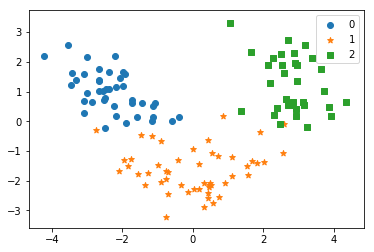

In [148]:
import matplotlib.pyplot as plt
markers = ['o','*','s']
plt.figure()
for ii,cl in enumerate(np.unique(y_train)):
    plt.scatter(X_train_projected[y_train==cl,0],X_train_projected[y_train==cl,1],marker=markers[ii],label=ii)
plt.legend(loc='upper right')
plt.show()

# PCA via sklearn 

In [152]:
from matplotlib.colors import ListedColormap
from Perceptron import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(standardize(X_train))
X_test_pca = pca.transform(standardize(X_test))

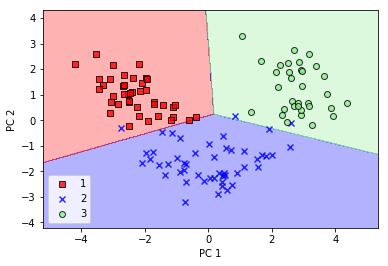

In [153]:
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# LDA via scikit-learn

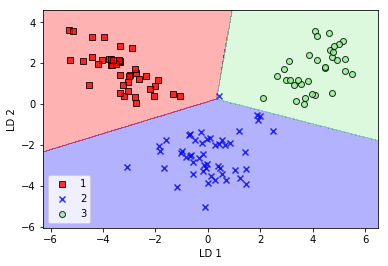

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(standardize(X_train), y_train)
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()